# Case Study on Probability for Data Science

Problem Statement:
To make a suitable machine learning algorithm to predict if the mushroom is
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\user\Downloads\mushrooms.csv")

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

So there are no null values in dataset

In [7]:
data.describe(include="object")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
for i in data.columns:
    print(i,":",data[i].unique())

class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


Drop "veil-type" as it has only 1 unique value.and "stalk-root" is having unknown values. 

In [11]:
data["stalk-root"].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

Unknown values are of count 2480

In [13]:
data["stalk-root"].replace(["?"], ["Unknown"], inplace=True)

In [14]:
data["stalk-root"].value_counts()

b          3776
Unknown    2480
e          1120
c           556
r           192
Name: stalk-root, dtype: int64

# Split X & y

In [12]:
X = data.drop(columns=['class', 'veil-type'], axis = 1)
y = data['class']

Do one hot encoding for columns with 2 or 3 values . And for rest apply label encoding

In [16]:
onehot = []
label = []
for i in X.columns:
    if X[i].nunique()>3:
        label.append(i)
    else:
        onehot.append(i)

In [17]:
onehot

['bruises',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'stalk-shape',
 'ring-number']

In [18]:
label

['cap-shape',
 'cap-surface',
 'cap-color',
 'odor',
 'gill-color',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [19]:
X = pd.get_dummies(data = X, columns=onehot)

In [20]:
from sklearn.preprocessing import LabelEncoder
for i in label:
    X[i] = LabelEncoder().fit_transform(X[i])

In [21]:
X

,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,...,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,stalk-shape_e,stalk-shape_t,ring-number_n,ring-number_o,ring-number_t
0,5,2,4,6,4,3,2,2,7,7,...,1,1,0,0,1,1,0,0,1,0
1,5,2,9,0,4,2,2,2,7,7,...,1,1,0,1,0,1,0,0,1,0
2,0,2,8,3,5,2,2,2,7,7,...,1,1,0,1,0,1,0,0,1,0
3,5,3,8,6,5,3,2,2,7,7,...,1,1,0,0,1,1,0,0,1,0
4,5,2,3,5,4,3,2,2,7,7,...,1,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,5,11,0,2,2,5,5,...,0,1,0,1,0,1,0,0,1,0
8120,5,2,4,5,11,0,2,2,5,5,...,0,1,0,1,0,1,0,0,1,0
8121,2,2,4,5,5,0,2,2,5,5,...,0,1,0,1,0,1,0,0,1,0
8122,3,3,4,8,0,0,2,1,7,7,...,1,1,0,0,1,0,1,0,1,0


In [22]:
#split into train and test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [25]:
# from sklearn.metrics import classification_report, confusion_matrix
# def check_model_metrices(y_test, y_pred):
#     print(classification_report(y_test, y_pred))
#     print('Confusion Matrix = \n', confusion_matrix(y_test, y_pred))

# Naive Bayes Classifier

In [29]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB().fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)
check_model_metrices(y_test, bnb_pred)

              precision    recall  f1-score   support

           e       0.85      0.95      0.90       843
           p       0.94      0.82      0.87       782

    accuracy                           0.89      1625
   macro avg       0.89      0.88      0.89      1625
weighted avg       0.89      0.89      0.89      1625

Confusion Matrix = 
 [[799  44]
 [141 641]]


In [30]:
from sklearn.naive_bayes import GaussianNB
gaussiannb = GaussianNB().fit(X_train, y_train)
gaussiannb_pred = gaussiannb.predict(X_test)
check_model_metrices(y_test, gaussiannb_pred)

              precision    recall  f1-score   support

           e       0.90      0.96      0.93       843
           p       0.95      0.88      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625

Confusion Matrix = 
 [[808  35]
 [ 93 689]]


In [31]:
from sklearn.naive_bayes import MultinomialNB
multinb = MultinomialNB().fit(X_train, y_train)
multinb_pred = multinb.predict(X_test)
check_model_metrices(y_test, multinb_pred)

              precision    recall  f1-score   support

           e       0.78      0.94      0.86       843
           p       0.92      0.72      0.81       782

    accuracy                           0.84      1625
   macro avg       0.85      0.83      0.83      1625
weighted avg       0.85      0.84      0.83      1625

Confusion Matrix = 
 [[792  51]
 [217 565]]


# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
check_model_metrices(y_test, rf_pred)

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix = 
 [[843   0]
 [  0 782]]


# linear SVM

In [34]:
from sklearn.svm import SVC
linear = SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)
check_model_metrices(y_test, linear_pred)

              precision    recall  f1-score   support

           e       0.98      0.98      0.98       843
           p       0.98      0.98      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

Confusion Matrix = 
 [[826  17]
 [ 13 769]]


# kNN Classifier

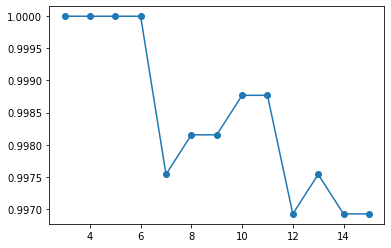

k value =  3
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix = 
 [[843   0]
 [  0 782]]


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def generate_kNN_model(x_train, y_train, x_test, k):
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn_model.fit(x_train, y_train)
    return knn_model.predict(x_test)

# Optimizing 'k' or 'n-neighbers' value
def find_optimal_k(x_train, y_train, x_test):
    accur_dict = dict()
    for k in np.arange(3,16):
        y_pred = generate_kNN_model(x_train, y_train, x_test, k)
        accur_dict[k] = accuracy_score(y_test, y_pred)
    #Plot
    plt.plot(list(accur_dict.keys()),list(accur_dict.values()), marker ='o')
    plt.show()
    optimal_k = max(accur_dict, key = lambda x: accur_dict[x])
    print('k value = ', optimal_k)
    return optimal_k
k_optimal = find_optimal_k(X_train, y_train, X_test)
knn_y_pred = generate_kNN_model(X_train, y_train, X_test, k_optimal)
check_model_metrices(y_test, knn_y_pred)

# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
decision_model = DecisionTreeClassifier()
decision_model.fit(X_train, y_train)
decision_pred = decision_model.predict(X_test)
check_model_metrices(y_test, decision_pred)

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix = 
 [[843   0]
 [  0 782]]


Decision Tree and kNN classifier gives best results with 100% accuracy.